In [1]:
import pm4py
import re

In [2]:
ocel = pm4py.read_ocel("results/mover_OCEL.jsonocel")
ocdfg = pm4py.discover_ocdfg(ocel)

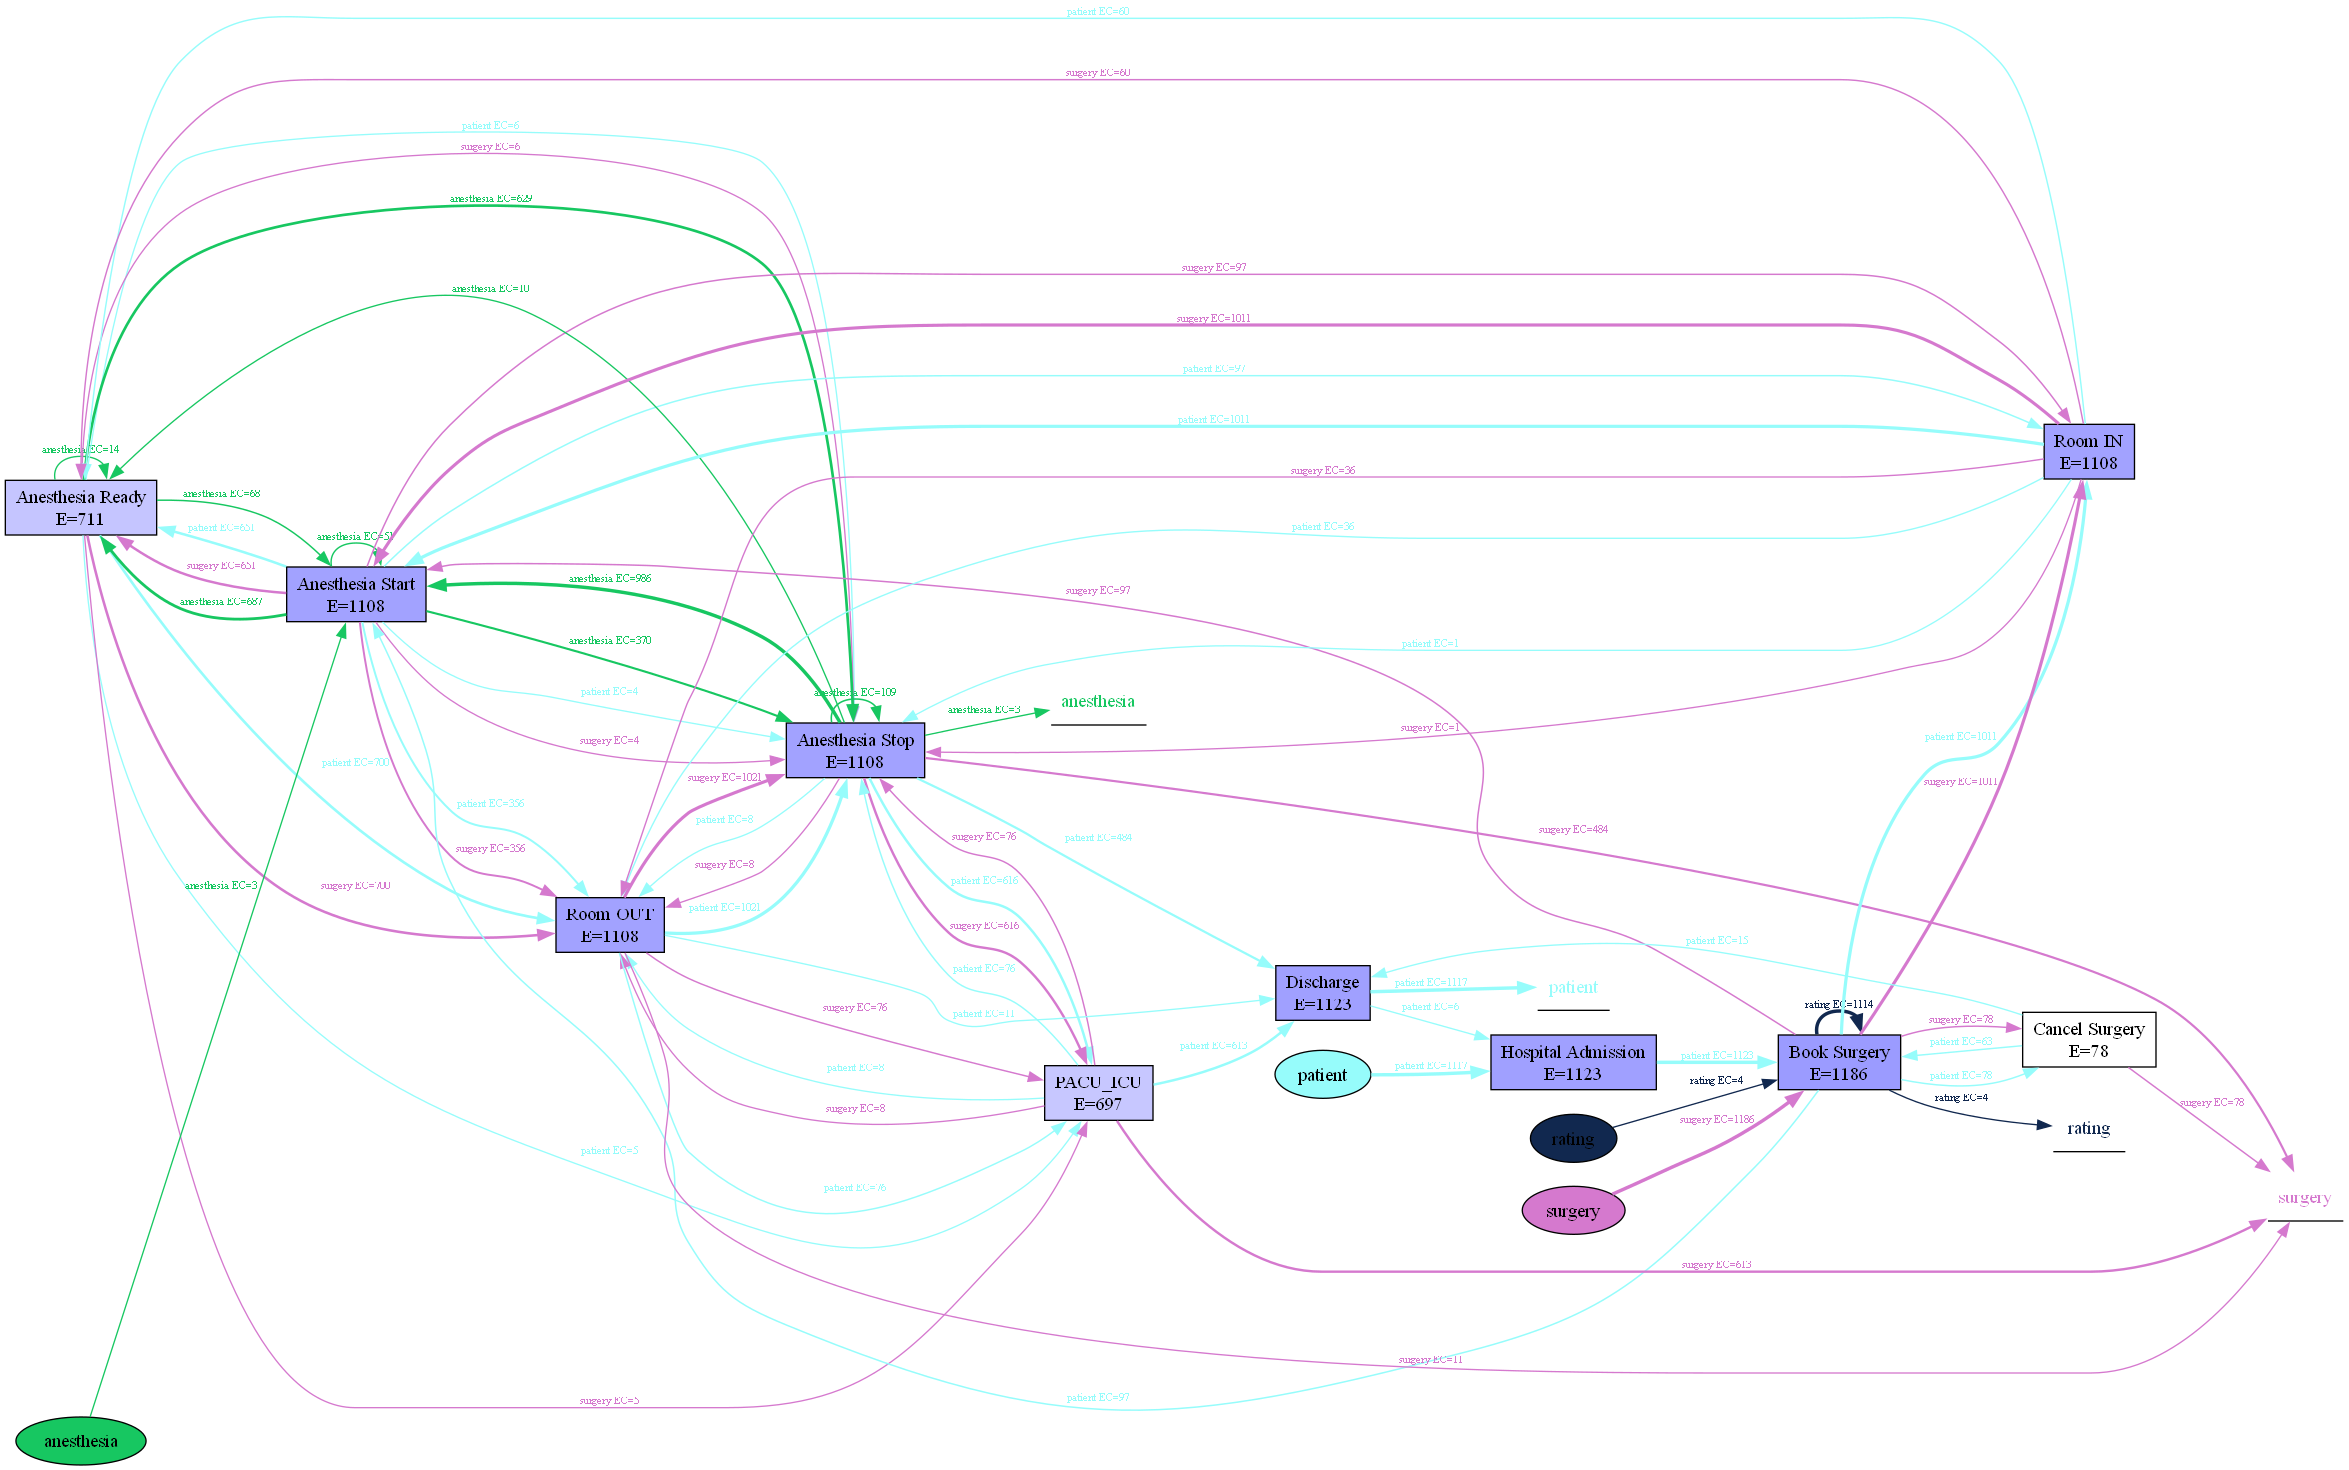

In [3]:
pm4py.view_ocdfg(ocdfg)

## Changing graph for better visualization

In [ ]:
pm4py.view_ocdfg(ocdfg, format="html")

In [5]:
OBJ_EDGE_COLORS = {
    "patient": "#D97A00",
    "surgery": "#7A5EF5",
    "anesthesia": "#7A0A58",
    "rating": "#2A9D8F",
}

ACTIVITY_NODE_COLORS = {
    "Anesthesia Ready": "#C79E63",
    "Anesthesia Start": "#C79E63",
    "Anesthesia Stop":  "#C79E63",
    "Book Surgery":     "#F5A9A9",
    "Cancel Surgery":   "#F5A9A9",
    "Room IN":          "#9BC8FF",
    "Room OUT":         "#9BC8FF",
    "Hospital Admission": "#9BC8FF",
    "PACU_ICU":         "#9BC8FF",
    "Discharge":        "#9BC8FF",
}

def recolor_edges(dot_code):
    def repl_edge(match):
        full_edge = match.group(0)
        label = match.group("label")

        m2 = re.match(r'([a-zA-Z_]+)\s+EC=', label)
        if not m2:
            return full_edge

        obj_type = m2.group(1)
        color = OBJ_EDGE_COLORS.get(obj_type, "#555555")  

        full_edge = re.sub(r'color="[^"]+"', f'color="{color}"', full_edge)
        return full_edge

    edge_regex = r'(?P<edge>(?P<src>"[^"]+")\s*->\s*(?P<tgt>"[^"]+")\s*\[label="(?P<label>[^"]+)"[^]]*\])'
    return re.sub(edge_regex, repl_edge, dot_code)


def recolor_nodes(dot_code):
    for act, color in ACTIVITY_NODE_COLORS.items():
        dot_code = re.sub(
            # rf'(label="{re.escape(act)}")([^]]*fillcolor=")[^"]+',
            # rf'\1\2{color}',
            rf'("?[0-9a-fA-F\-]+"?\s*\[label="{re.escape(act)}[^"]*"[^]]*fillcolor=")[^"]+',
            rf'\g<1>{color}',
            dot_code
        )
    return dot_code


def recolor_dot(dot_code):
    dot_code = recolor_edges(dot_code)
    dot_code = recolor_nodes(dot_code)
    return dot_code

dot_ordered = open("templates/figure_3.dot", "r", encoding="utf8").read()

html_raw = open("jupyter_html_vis.html", "r", encoding="utf8").read()
m = re.search(r"(digraph ocdfg\s*{.*})", html_raw, re.S)
dot_raw = m.group(1)

dot_final = recolor_dot(dot_ordered)

def escape_for_js(s):
    s = s.replace("\\", "\\\\")
    s = s.replace("`", "\\`")
    s = s.replace("${", "\\${")
    return s

dot_js = escape_for_js(dot_final)

html_template = open("templates/template.html", "r", encoding="utf8").read()
html_out = html_template.replace("REPLACE_WITH_DOT_CODE", dot_js)

with open("results/ocdfg.html", "w", encoding="utf8") as f:
    f.write(html_out)

print("✔ ocdfg.html was created!")

✔ ocdfg.html was created!


In [6]:
import pydot
import subprocess

graph = pydot.graph_from_dot_file("templates/figure_3.dot")[0]
graph.write_png("results/figure_3.png")

In [7]:
subprocess.run([
    "dot",
    "-Tpng",
    "-Gdpi=600",
    "templates/figure_3.dot",
    "-o",
    "results/figure_3.png"
])

CompletedProcess(args=['dot', '-Tpng', '-Gdpi=600', 'templates/figure_3.dot', '-o', 'results/figure_3.png'], returncode=0)

In [8]:
from IPython.display import Image
Image("results/figure_3.png")